## CNN for classifying malignant vs benign skin cancer pictures

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
import cv2

## 1. Explore Data

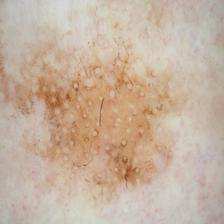

In [53]:
image = Image.open(r"C:\Users\simra\OneDrive\Documents\Python Scripts\Skin Cancer Detection CNN\train\malignant\5.jpg")
image

In [3]:
print(image.size)
print(image.mode)
print(image.format)

(224, 224)
RGB
JPEG


In [4]:
def convert_image_to_array(filepath):
    files = glob.glob(filepath)
    temp_list = []
    for file in files:
        image = cv2.imread(file)
        temp_list.append(image)
    temp_list = np.array(temp_list, dtype = 'uint8')
    return temp_list

In [5]:
training_malignant = convert_image_to_array(r"C:\Users\simra\OneDrive\Documents\Python Scripts\Skin Cancer Detection CNN\train\malignant\*.jpg")
training_benign = convert_image_to_array(r"C:\Users\simra\OneDrive\Documents\Python Scripts\Skin Cancer Detection CNN\train\benign\*.jpg")
test_malignant = convert_image_to_array(r"C:\Users\simra\OneDrive\Documents\Python Scripts\Skin Cancer Detection CNN\test\malignant\*.jpg")
test_benign = convert_image_to_array(r"C:\Users\simra\OneDrive\Documents\Python Scripts\Skin Cancer Detection CNN\test\benign\*.jpg")

In [6]:
training_malignant.shape

(1197, 224, 224, 3)

In [7]:
training_benign.shape

(1440, 224, 224, 3)

In [8]:
test_benign.shape

(360, 224, 224, 3)

In [9]:
test_malignant.shape

(300, 224, 224, 3)

## 2. Data Preprocessing

In [10]:
# create labels for the data where 1 is benign and 0 is malignant

train_malignant_labels = np.zeros(training_malignant.shape[0])
train_benigin_labels = np.ones(training_benign.shape[0])
test_malignant_labels = np.zeros(test_malignant.shape[0])
test_benign_labels = np.ones(test_benign.shape[0])

In [11]:
# normalize RGB values between 0 and 1

training_malignant = training_malignant/255.0
training_benign = training_benign/255.0
test_malignant = test_malignant/255.0
test_benign = test_benign/255.0

In [12]:
# Concat training data together and test data together

training_set = np.concatenate((training_malignant, training_benign),axis = 0)
training_labels = np. concatenate((train_malignant_labels, train_benigin_labels), axis = 0)

test_set = np.concatenate((test_malignant, test_benign), axis = 0)
test_labels = np.concatenate((test_malignant_labels, test_benign_labels), axis = 0)

In [13]:
'''Randomize our arrays since malignant data is all at the start of the sets and benign data is all at the back. 
   Ensure that the labels array is shuffled in the same manner'''

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_training, y_training = unison_shuffled_copies(training_set, training_labels)
X_test, y_test = unison_shuffled_copies(test_set, test_labels)

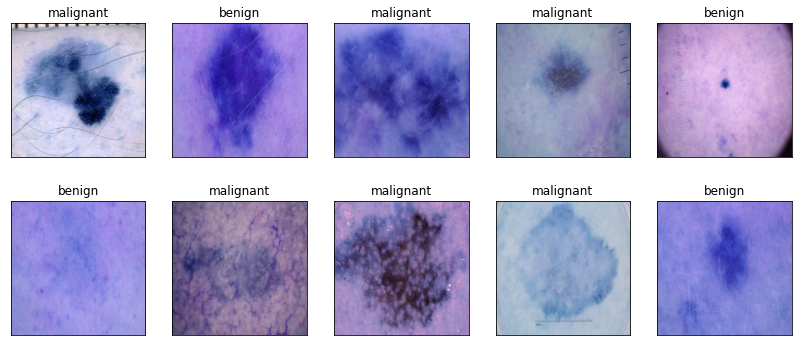

In [15]:
# Plot samples of pictues with their correspondin labels 

plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow((X_training[i]*255).astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    if y_training[i] == 1:
        plt.title('benign')
    else:
        plt.title('malignant')
plt.show()

## 3. Model Building

In [16]:
import tensorflow as tf

In [20]:
# Build model using conv2d, maxpool, dense, and dropout layers

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.1),
    
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.1),
        
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.Flatten(),    
    
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),  
    
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']  
             )

history = model.fit(X_training, y_training, validation_data=(X_test, y_test),
           shuffle=True, epochs= 20)

Epoch 1/20
83/83 [==============================] - 159s 2s/step - loss: 1.2624 - accuracy: 0.5115 - val_loss: 0.5184 - val_accuracy: 0.7167
Epoch 2/20
83/83 [==============================] - 179s 2s/step - loss: 0.5316 - accuracy: 0.7277 - val_loss: 0.4972 - val_accuracy: 0.7758
Epoch 3/20
83/83 [==============================] - 208s 3s/step - loss: 0.4644 - accuracy: 0.7785 - val_loss: 0.4544 - val_accuracy: 0.7621
Epoch 4/20
83/83 [==============================] - 208s 3s/step - loss: 0.4446 - accuracy: 0.7860 - val_loss: 0.4007 - val_accuracy: 0.7894
Epoch 5/20
83/83 [==============================] - 201s 2s/step - loss: 0.3732 - accuracy: 0.8111 - val_loss: 0.4857 - val_accuracy: 0.7530
Epoch 6/20
83/83 [==============================] - 201s 2s/step - loss: 0.3917 - accuracy: 0.8088 - val_loss: 0.4051 - val_accuracy: 0.7970
Epoch 7/20
83/83 [==============================] - 190s 2s/step - loss: 0.3853 - accuracy: 0.8041 - val_loss: 0.3766 - val_accuracy: 0.8121
Epoch 8/20
83

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)       

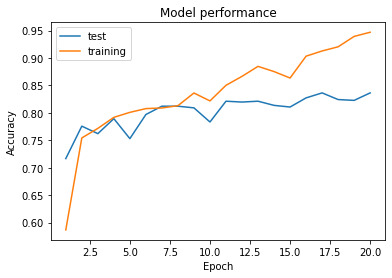

In [49]:
# Plot model learning through epochs

plt.plot(np.arange(1,21),history.history['val_accuracy'], label = 'test')
plt.plot(np.arange(1,21),history.history['accuracy'], label = 'training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model performance')
plt.legend()
plt.show()

In [48]:
# Final accuracy of model

from sklearn.metrics import accuracy_score
accuracy = (accuracy_score(y_test, y_pred.round(), normalize=False))/len(y_test)
print (accuracy)

0.8363636363636363
